## Confident and Correct/Incorrect Events and their Composites 

U/GPH/EHF on relevant dates for the 90th percentile predictions from the EOF LSTM Model. 

File created 7/23/2025

In [1]:
#import cell first
%matplotlib inline
import numpy as np
import pandas as pd
import math
from random import seed
from random import randint
from random import sample
import xarray as xr

import pickle

##plotting related imports
import matplotlib.pyplot as plt

In [7]:
#load input data
infile = open("../../REAL/eof_data/vertanom_u.p","rb",)
u_input = pickle.load(infile)  ##vertical U cross section
U_14 = u_input[52:62, 33:168, :, :].reshape((10, 135, 37, 36))
infile.close()

infile = open("../../REAL/eof_data/vertanom_ehf.p","rb",)
ehf_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
EHF_14 = ehf_input[52:62, 33:168, :, :].reshape((10, 135, 37, 180))
infile.close()

infile = open("../../REAL/eof_data/vertanom_gph.p","rb",)
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
GPH_14= gph_input[52:62, 33:168, :, :].reshape((10, 135, 37, 180))
infile.close()

print("U Wind shape: ",U_14.shape)
print("EHF shape: ",EHF_14.shape)
print("GPH shape: ",GPH_14.shape)

U Wind shape:  (10, 135, 37, 36)
EHF shape:  (10, 135, 37, 180)
GPH shape:  (10, 135, 37, 180)


In [8]:
##open indice files
infile = open("posXtest_eur14_eof.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("FposXtest_eur14_eof.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("negXtest_eur14_eof.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("FnegXtest_eur14_eof.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [9]:
####now I wanna make these plots SO ... I am adding an index column on to X_test ... full version. 
ranges = np.array([x for x in range(0,135*10,1)])
ranges = ranges.reshape(10,135) 
ranges.shape

(10, 135)

In [10]:
##set lat and lon arrays
##separate set of longitudes for PV and others
lat = np.arange(90, 18, -2)
print("Len latitudes: ", len(lat))
lon = np.arange(0, 360, 2)
print("Len longitudes: ", len(lon))


lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

Len latitudes:  36
Len longitudes:  180
Len levels:  37


Now ... I am going to have to designate the  events of interest. 

I will have to search and etablish when it is the greatest, save the indices, and plot composites. 

In [11]:
##Correct Positive Events
U_cpos = np.empty((len(posXtest), 37, 36))
EHF_cpos = np.empty((len(posXtest), 37, 180))
GPH_cpos = np.empty((len(posXtest), 37, 180))

for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(posXtest)):
            pos_index = posXtest[k]
            if pos_index == date_index:
                U_cpos[k,:,:] = U_14[i,j,:,:]
                EHF_cpos[k,:,:] = EHF_14[i,j,:,:]
                GPH_cpos[k,:,:] = GPH_14[i,j,:,:]
                
##reshape
                
##False Positive Events
U_Fpos = np.empty((len(FposXtest), 37, 36))
EHF_Fpos = np.empty((len(FposXtest), 37, 180))
GPH_Fpos = np.empty((len(FposXtest), 37, 180))

for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FposXtest)):
            pos_index = FposXtest[k]
            if pos_index == date_index:
                U_Fpos[k,:,:] = U_14[i,j,:,:]
                EHF_Fpos[k,:,:] = EHF_14[i,j,:,:]
                GPH_Fpos[k,:,:] = GPH_14[i,j,:,:]

In [12]:
##Correct Negative Events
U_cneg = np.empty((len(negXtest), 37, 36))
EHF_cneg = np.empty((len(negXtest), 37, 180))
GPH_cneg = np.empty((len(negXtest), 37, 180))

for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(negXtest)):
            neg_index = negXtest[k]
            if neg_index == date_index:
                U_cneg[k,:,:] = U_14[i,j,:,:]
                EHF_cneg[k,:,:] = EHF_14[i,j,:,:]
                GPH_cneg[k,:,:] = GPH_14[i,j,:,:]
                
##False Negative Events
U_Fneg = np.empty((len(FnegXtest), 37, 36))
EHF_Fneg = np.empty((len(FnegXtest), 37, 180))
GPH_Fneg = np.empty((len(FnegXtest), 37, 180))

for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FnegXtest)):
            neg_index = FnegXtest[k]
            if neg_index == date_index:
                U_Fneg[k,:,:] = U_14[i,j,:,:]
                EHF_Fneg[k,:,:] = EHF_14[i,j,:,:]
                GPH_Fneg[k,:,:] = GPH_14[i,j,:,:]

### Now that I have the arrays for the composites, plot them.

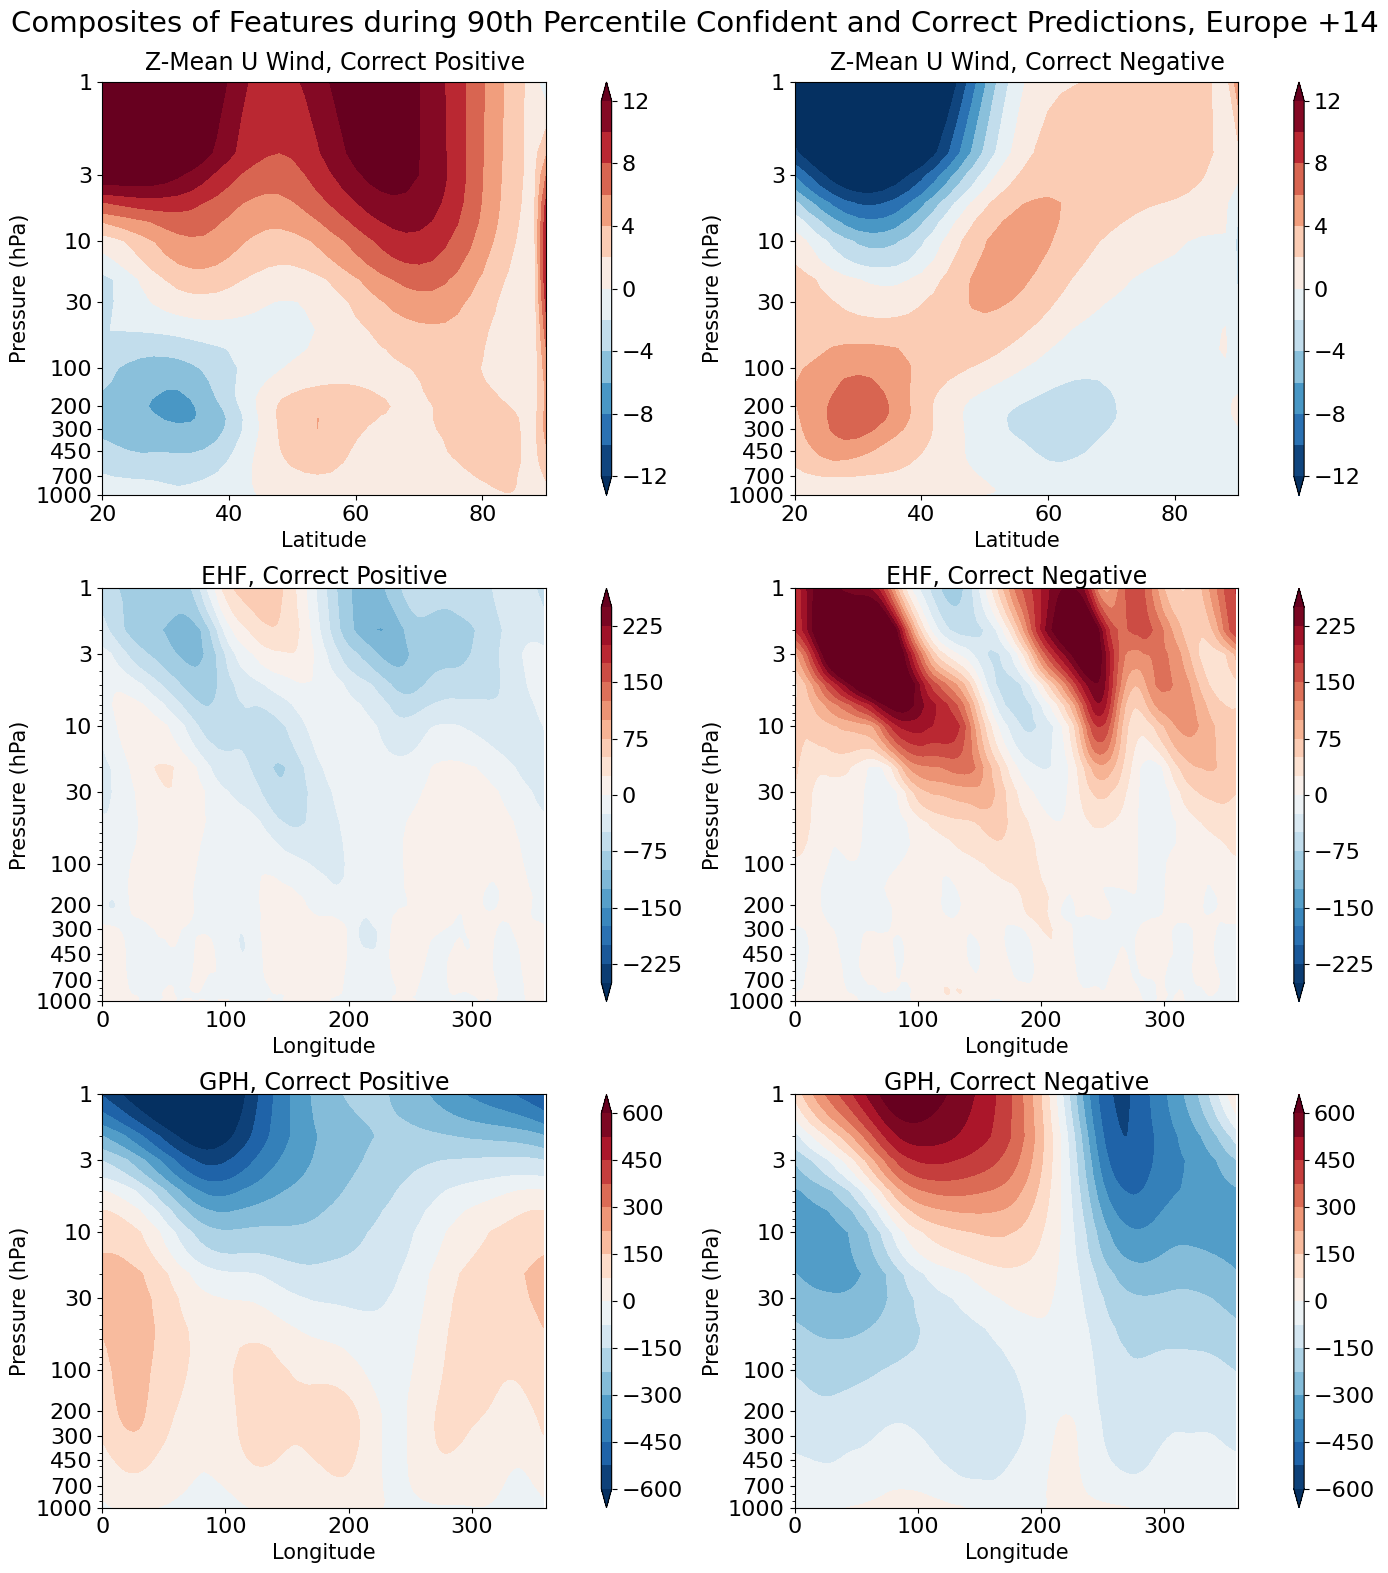

In [13]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("Composites of Features during 90th Percentile Confident and Correct Predictions, Europe +14",fontsize=21)   

titles = ["Correct Positive", "Correct Negative"]
data = [U_cpos,U_cneg,
        EHF_cpos,EHF_cneg,
        GPH_cpos,GPH_cneg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
#plt.savefig("Seus14_Comps_Correct.png")
plt.show()

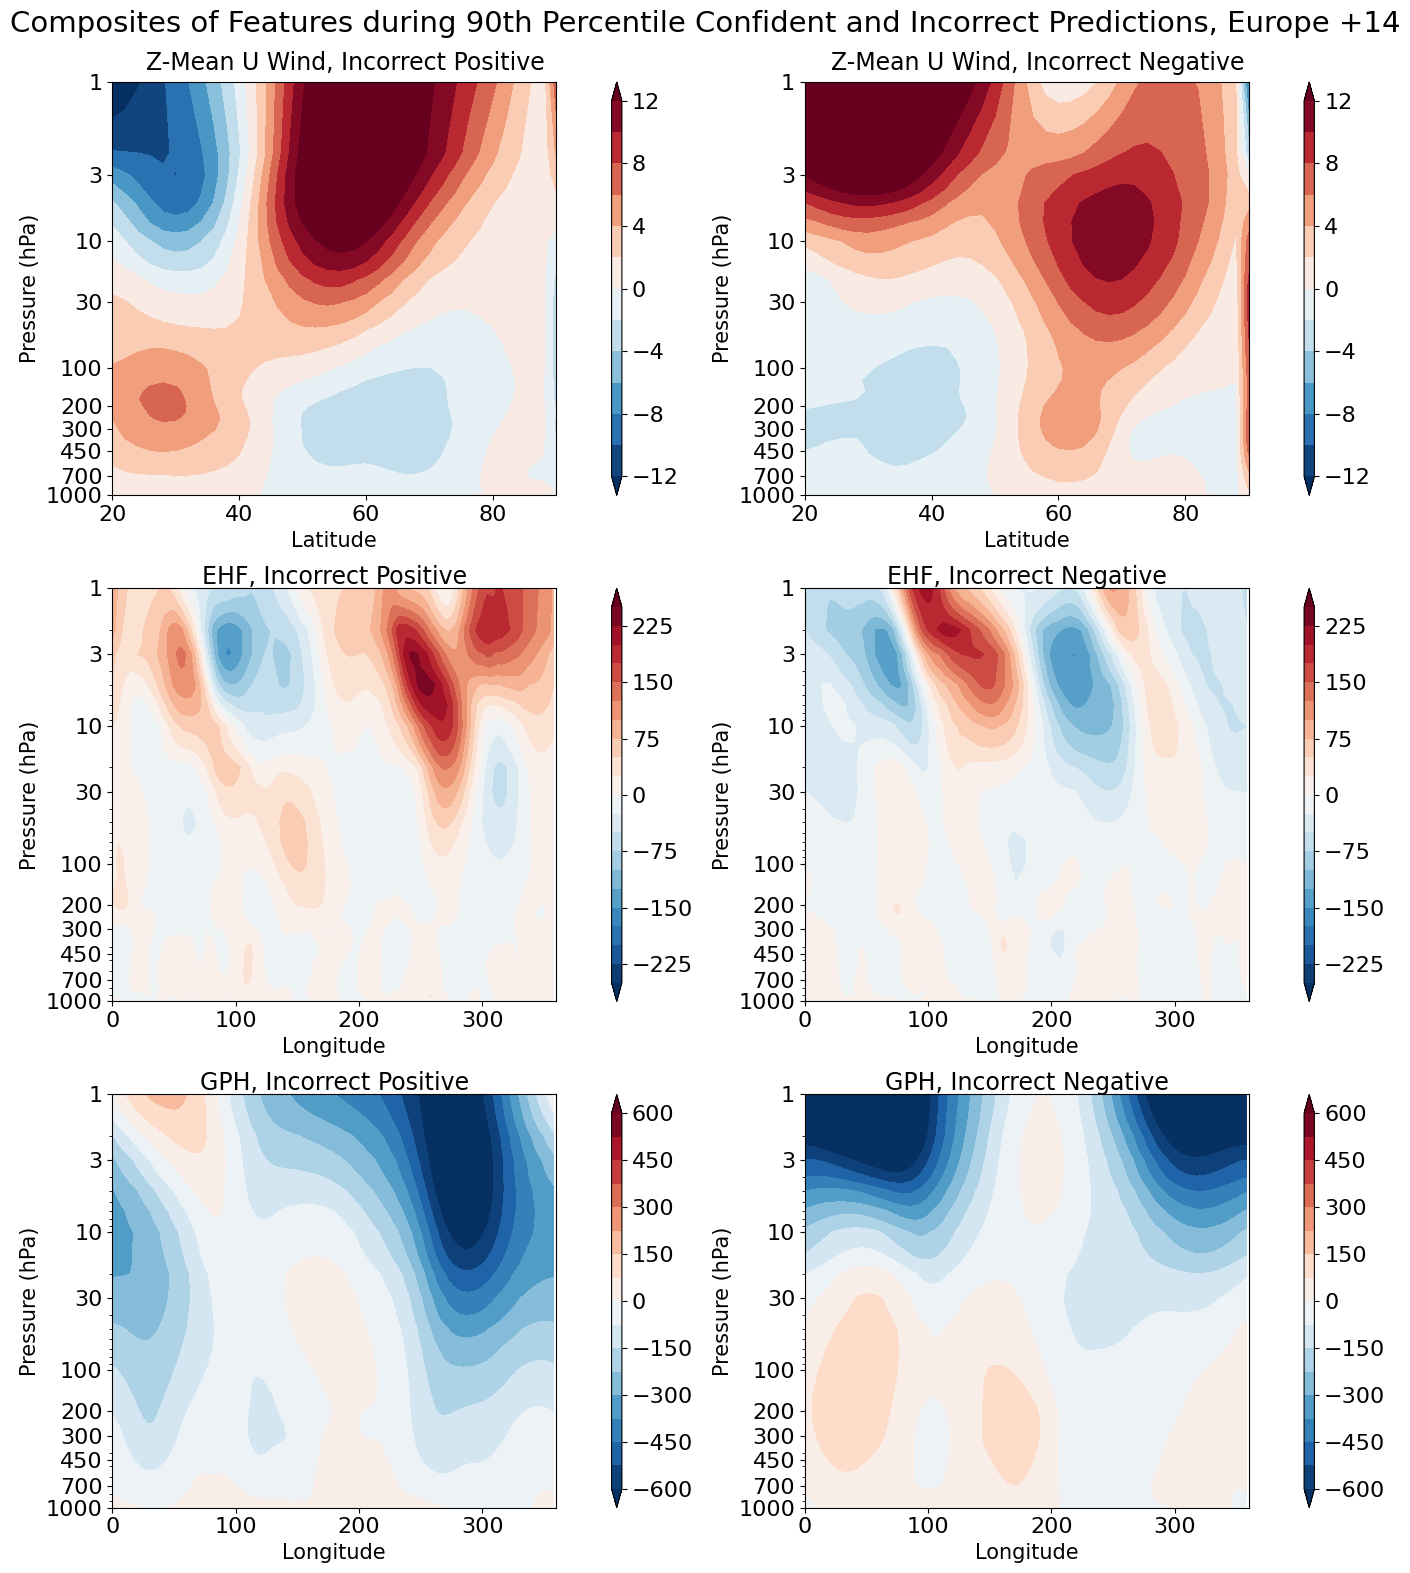

In [14]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("Composites of Features during 90th Percentile Confident and Incorrect Predictions, Europe +14",fontsize=21)   

titles = ["Incorrect Positive", "Incorrect Negative"]
data = [U_Fpos,U_Fneg,
        EHF_Fpos,EHF_Fneg,
        GPH_Fpos,GPH_Fneg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
#plt.savefig("Seus14_Comps_Inorrect.png")
plt.show()